In [72]:
import gamspy as gp
import gamspy.math as gpm
from gamspy import Sum, Card

import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import contextily as ctx

In [33]:
drone = pd.read_csv("/home/samjenkins2001/CS524/Optimize/drone.csv")
loc = pd.read_csv("/home/samjenkins2001/CS524/Optimize/location.csv")

drone_df = pd.DataFrame(drone)
loc_df = pd.DataFrame(loc)

In [34]:
locations = list(loc_df["Location"])
models = list(drone_df["Drone Models"])
loc_df.index = locations
drone_df.index = models
loc_df = loc_df.drop(columns = "Location")
drone_df = drone_df.drop(columns = "Drone Models")
display(loc_df)
display(drone_df)

,Latitude,Longitude,Payload,Demand
Camp Randall,43.070227,-89.412687,10.0000,10 Footballs
Sam's Apartment,43.075462,-89.393407,2.6250,History of Optimization book
3006 Sunrise Ct,43.108656,-89.473928,5.0000,Bird Food
Kohl Center,43.069709,-89.396907,4.6875,5 New Basketball Jerseys
Computer Sciences Building,43.071286,-89.406561,6.1700,10 NVIDIA Jetsons
Noland Hall,43.071678,-89.404489,1.5000,4 cups of Pepper Seeds
Lake Mendota,43.107811,-89.419515,4.0000,Fishing Rod
The Kollege Klub,43.075951,-89.397279,11.2500,3 Bottles of NA Vodka
Tenney Park,43.092186,-89.367120,2.2000,Drinking Fountain Filter
The Bakke,43.076852,-89.420159,3.4500,5 BUCKS Pre Workout


,Carrying Capacity,Fly in Rain,Speed,Radius,Charging Current
MK30,5,1,80.47,32.1,840
MK27,5,0,80.47,16.1,560


In [ ]:
## Create final data table

In [78]:
## Variables

# Number of MK30 Drones used
# Number of MK27 Drones used

# Amount of charge used on MK30 Drones (Wh)
# Amount of charge used on MK27 Drones (Wh)

#Battery Percentage for each drone

In [74]:
## Optimization Model

## Objective
# Minimize Energy Consumption

## Payload Constraint
# Each Drone <= 5 lbs

## Speed Constraint
# Each Drone <= 80.47 km / hr

## Weather Constraint
# If rain, only MK 30 Drones

## Range Constraint
# Ensure each drone returns to charging stations with non-zero battery life

## Charge Constraint
# Ensure each drone cannot be charged > 100%

## Item Constraint
# Ensure Drone only delivers whole items (ie. multiples of 0.5 lbs to the zoo for each animal slipper)

In [75]:
## Pareto Curve showing Tradeoff between Energy Consumption and Delivery Time

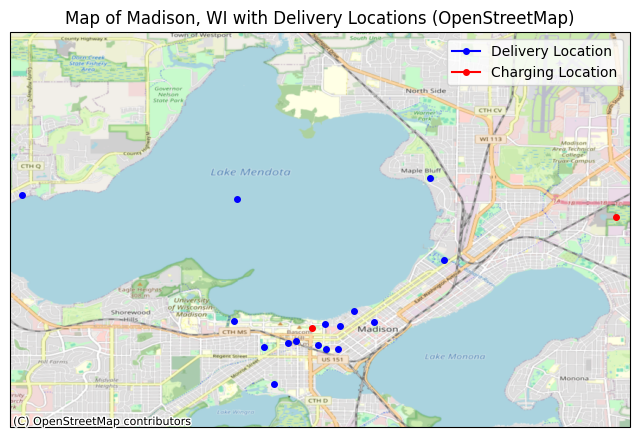

In [71]:
latitudes = list(loc_df["Latitude"])
longitudes = list(loc_df["Longitude"])

coordinates = list(zip(latitudes, longitudes))

delivery_coords = coordinates[:-2]
charge_coords = coordinates[-2:]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([-89.477, -89.32, 43.05, 43.15], crs=ccrs.PlateCarree())

ctx.add_basemap(ax, crs=ccrs.PlateCarree(), source=ctx.providers.OpenStreetMap.Mapnik)

for coord in delivery_coords:
    latitude = coord[0]
    longitude = coord[1]
    ax.plot(longitude, latitude, marker='o', color='blue', markersize=4, transform=ccrs.PlateCarree(), label="Delivery Location" if coord == delivery_coords[0] else "")

for coord in charge_coords:
    latitude = coord[0]
    longitude = coord[1]
    ax.plot(longitude, latitude, marker='o', color='red', markersize=4, transform=ccrs.PlateCarree(), label="Charging Location" if coord == charge_coords[0] else "")

plt.legend()

plt.title("Map of Madison, WI with Delivery Locations (OpenStreetMap)")

plt.show()


